## BFS - Breath first search algorithm

In [2]:
graph = {
    'A' : ['B', 'C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

def bfs(graph, start_node):
    visited = []
    queue = [start_node]
    print("BFS traversal order : ")
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            print(node, end="")
            visited.append(node)
            
            for neighbor in graph[node]:
                if neighbor not in visited and queue not in visited:
                    queue.append(neighbor)
    print()
bfs(graph, 'A')

BFS traversal order : 
ABCDEF


## DFS - Depth First search algorithm

In [4]:
graph = {
    'A' : ['B', 'C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end="")
    
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
            
print("DFS traversal order : ")
dfs(graph, 'A')

DFS traversal order : 
ABDEFC

## IDFS - Depth first search algorithm

In [8]:
graph = {
    'A' : ['B', 'C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

def idfs(graph, start_node):
    visited = set()
    stack = [start_node]
    
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            print(vertex, end="")
            visited.add(vertex)
            
            for neighbor in reversed(graph[vertex]):
                if neighbor not in visited:
                    stack.append(neighbor)
    print()
print("IDFS traversal order: ")
idfs(graph, 'A')

IDFS traversal order: 
ABDEFC


## AdaBoost esemble learning

In [9]:
import pandas as pd 
from sklearn import model_selection 
from sklearn.ensemble import AdaBoostClassifier 

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'pedi', 'mass', 'age', 'class']

dataframe = pd.read_csv(url, names=names)
array = dataframe.values 
X = array[:, 0:8]
Y = array[:, 8]

seed = 7
num_trees = 30

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: ", results.mean())

Accuracy:  0.7552460697197538


## Decision Tree Learning

Learned decision tree rules: 

|--- Humidity_High <= 0.50
|   |--- class: 1
|--- Humidity_High >  0.50
|   |--- Wind_Weak <= 0.50
|   |   |--- class: 0
|   |--- Wind_Weak >  0.50
|   |   |--- Outlook_Sunny <= 0.50
|   |   |   |--- class: 1
|   |   |--- Outlook_Sunny >  0.50
|   |   |   |--- class: 0

Accuracy: 0.60
Training time: 0.00
Prediction time: 0.01


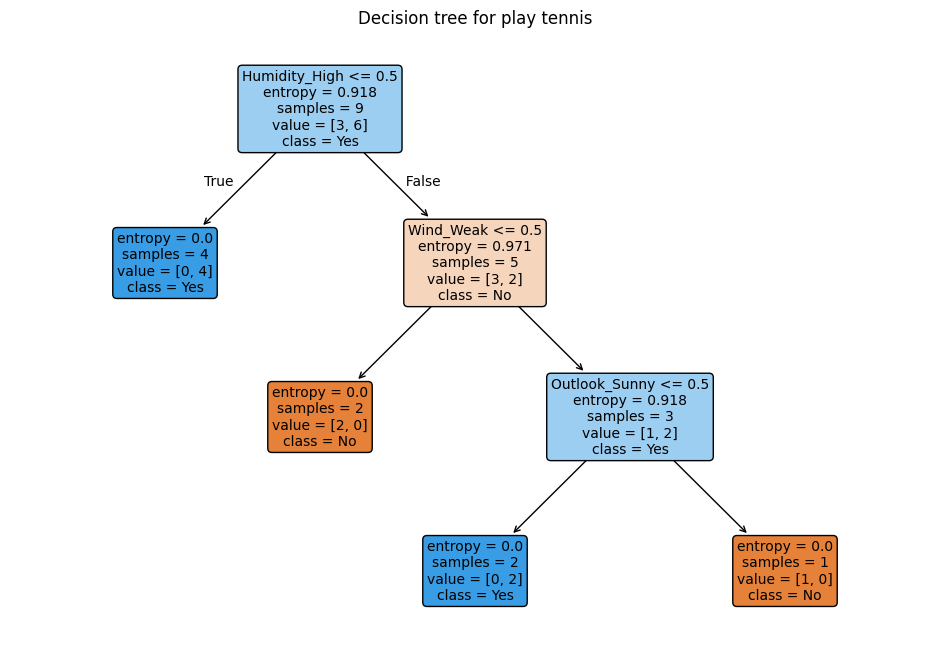

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree 
import matplotlib.pyplot as plt
import time 

url = "https://gist.githubusercontent.com/DiogoRibeiro7/c6590d0cf119e87c39e31c21a9c0f3a8/raw/PlayTennis.csv"
data = pd.read_csv(url)

X = pd.get_dummies(data.drop(columns=['Play Tennis']))
y = data['Play Tennis'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

start_train = time.time()
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
train_time = time.time() - start_train 

start_pred = time.time()
y_pred = clf.predict(X_test)
pred_time = time.time() - start_pred 

accuracy = accuracy_score(y_test, y_pred)

print("Learned decision tree rules: \n")
print(export_text(clf, feature_names=list(X.columns)))
print(f"Accuracy: {accuracy:.2f}")
print(f"Training time: {pred_time:.2f}")
print(f"Prediction time: {train_time:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(
    clf, 
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)      

plt.title("Decision tree for play tennis")
plt.show()